In [14]:
from PIL import Image
from PIL import ImageFilter 
import skimage 
from skimage import io, exposure, filters, morphology 
from skimage.filters import unsharp_mask
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from scipy.ndimage import convolve
import sklearn 
import math

This is the same as ./grayscaleEdgeHighlighter.ipynb except it is done on an RGB image. Most of the concepts are explained in 
./grayscaleEdgeHighlighter.ipynb

C:\Users\jimxa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\skimage\_shared\utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


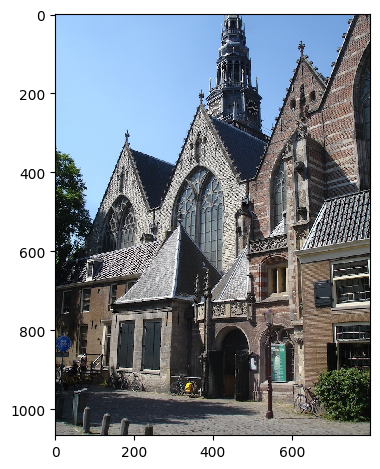

In [15]:
original = io.imread('./Images/Amsterdam.JPG')
im = io.imread('./Images/Amsterdam.JPG')
im = unsharp_mask(im, radius=1, amount=10)
im = filters.gaussian(im, sigma=5)
io.imshow(original)
io.show()

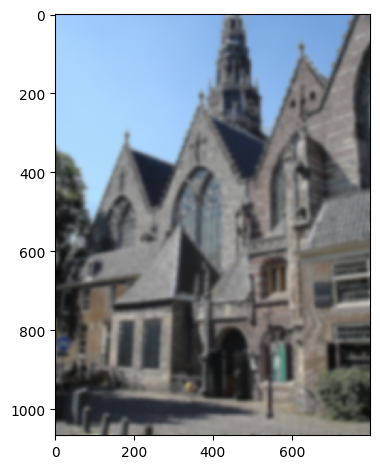

In [16]:
#After gaussian is applied to blurr and remove noise and unsharp mask increases contrast around edges
io.imshow(im)
io.show()

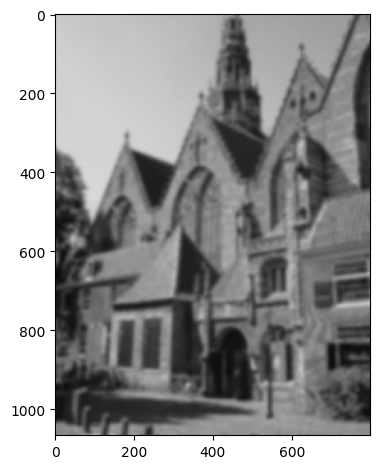

In [17]:
grayscaleim = skimage.color.rgb2gray(im)
io.imshow(grayscaleim)
io.show()

In [18]:
#apply vertical sobel filter
sobelY = np.array([[-1, 0, 1], 
                   [-2, 0, 2], 
                   [-1, 0, 1]])

#apply horizontal sobel filter
sobelX = np.array([[ 1, 2, 1], 
                    [ 0, 0, 0], 
                    [-1,-2,-1]])

sobelYim = convolve(grayscaleim, sobelY, mode = 'constant', cval = 0)
sobelXim = convolve(grayscaleim, sobelX, mode = 'constant', cval = 0)

See ./grayscaleEdgeHighlighter.ipynb for more details on the sobel filter

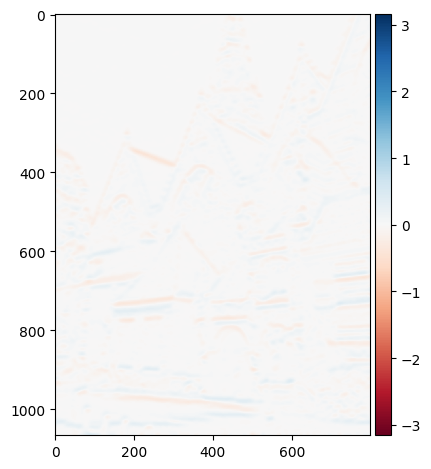

In [20]:
io.imshow(sobelXim)
io.show()

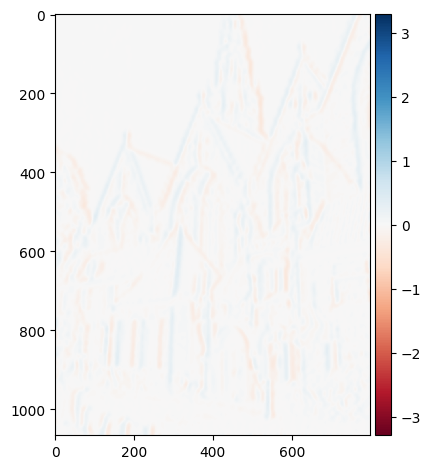

In [21]:
io.imshow(sobelYim)
io.show()

In [22]:
combinedGradients = []
for i in range(min(len(sobelXim),len(sobelYim))):
    combinedGradients.append([])
    for j in range(min(len(sobelXim[i]), len(sobelYim[i]))):
        combinedGradients[i].append(math.sqrt((sobelXim[i][j] ** 2) + (sobelYim[i][j] ** 2)))
combinedGradients = np.array(combinedGradients)

Combining the filters is explained in ./grayscaleEdgeHighlighter.ipynb 

C:\Users\jimxa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


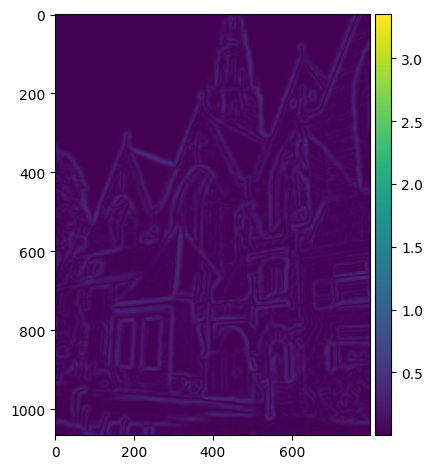

In [23]:
io.imshow(combinedGradients)
io.show()

In [29]:
whitishHighlights = []
scale = 800

for i in range(min(len(combinedGradients),len(original))):
    whitishHighlights.append([])
    for j in range(min(len(combinedGradients[i]),len(original[i]))):
        whitishHighlights[i].append([])
        for channel in range(3): #one for each color channel
            #the min function is included for clamping (any value above 255 is set to 255)
            whitishHighlights[i][j].append(min(255, int(original[i][j][channel] + scale * combinedGradients[i][j])))
whitishHighlights = np.array(whitishHighlights)


Add the gradients to the RGB image. Grayscale in terms of the RGB color space follows the gray line, where the R value is the same as the G value and the B value. So in order to add combinedGradients which is a grayscale image to the original RGB image: a grayscale pixel with value 33 is turned into a tuple of size 3: (33,33,33) and combined with the original image.

C:\Users\jimxa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


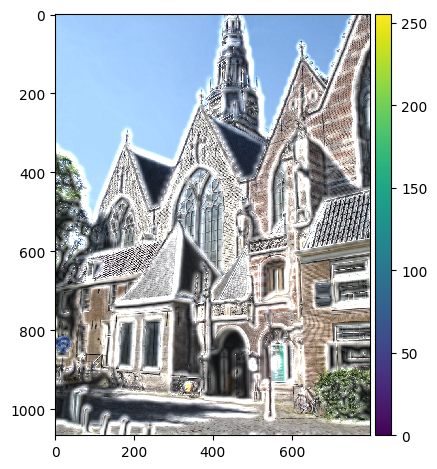

In [30]:
io.imshow(whitishHighlights)
io.show()